In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
#import xgboost as xgb
from catboost import CatBoostRegressor, Pool

# 1. Data Analysis:
- isna(), info(), decribe(), crosstab()
- plots
- correlation matrix 
- sort data by date

In [177]:
df1 = pd.read_csv('exercise.csv')
df2 = pd.read_csv('calories.csv')

In [178]:
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [179]:
df2.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [180]:
# Combine the two dataframes
df = pd.concat([df1, df2], axis=1)

In [181]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   User_ID     15000 non-null  int64  
 9   Calories    15000 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 1.1+ MB


In [183]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,1.497736e+07,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,2.872851e+06,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000116e+07,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,1.247419e+07,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,1.499728e+07,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,1.744928e+07,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,1.999965e+07,314.000000


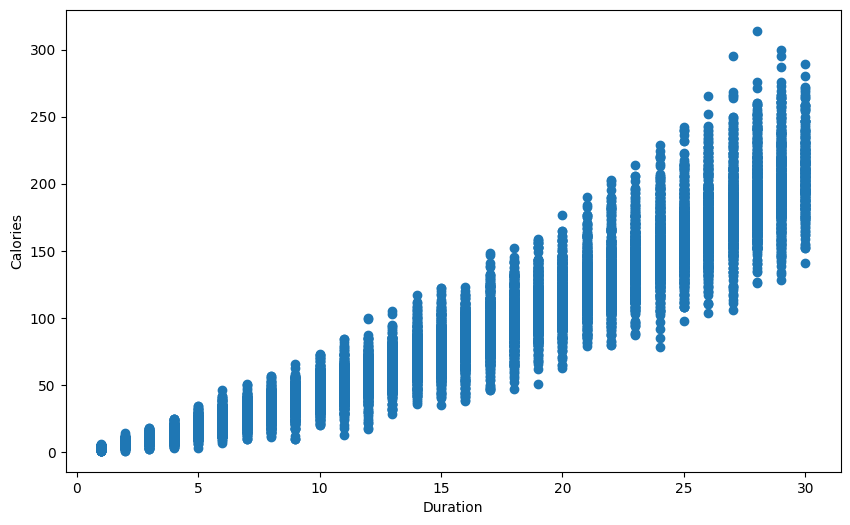

In [184]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.show()


In [185]:
# missing data
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
User_ID       0
Calories      0
dtype: int64

In [186]:
# gender value counts
df['Gender'].value_counts()


Gender
female    7553
male      7447
Name: count, dtype: int64

In [187]:
# column names convert to lower case
df.columns = df.columns.str.lower()

In [188]:
df.head()

,user_id,gender,age,height,weight,duration,heart_rate,body_temp,user_id,calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


# 2. Convert Categorical Features into Numericals 
- One hot encoder: Lasso or Ridge
- Label encoding: XGBoost and RandomForest
- Lower cardinality columns: One hot encoding
- High cardinality columns: Target encoding, Ordinal encoding
- Convert to category
- https://www.kaggle.com/code/gokuleshwaran/feature-engineering-for-house-prices/edit

In [189]:
# gender column: replace male with 0 and female with 1
df.replace({'gender': {'male':0, 'female':1}}, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34844\1533126976.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'gender': {'male':0, 'female':1}}, inplace=True)


In [190]:
df.head()

,user_id,gender,age,height,weight,duration,heart_rate,body_temp,user_id,calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     15000 non-null  int64  
 1   gender      15000 non-null  int64  
 2   age         15000 non-null  int64  
 3   height      15000 non-null  float64
 4   weight      15000 non-null  float64
 5   duration    15000 non-null  float64
 6   heart_rate  15000 non-null  float64
 7   body_temp   15000 non-null  float64
 8   user_id     15000 non-null  int64  
 9   calories    15000 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 1.1 MB


# 3. Split the data into x and y label

In [192]:
# Split the data into features and target
X = df.drop(['calories','user_id'], axis=1)
y = df['calories']


In [193]:
X.head()    

,gender,age,height,weight,duration,heart_rate,body_temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [194]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: calories, dtype: float64

# 4. Split the data into x_train, x_test, y_train, y_test

In [195]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
X_train.shape, X_test.shape

((12000, 7), (3000, 7))

# 5. Evaluation
- show_scores(model, x_train, x_test, y_train, y_test)
- score_dataset()
- y_preds = model.predict()
- y_probs = model.predict_proba()

In [197]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error 
# mean_squared_log_error
import numpy as np
import time
def show_scores(model, x_train, x_test, y_train, y_test):
  # Start timing the training process
  start_train_time = time.time()
  end_train_time = time.time()
  training_time = end_train_time - start_train_time

  # Calculate the model's predictions
  train_preds = model.predict(x_train)
  test_preds = model.predict(x_test)

  # Calculate and time MAE, MSE, and R2 for the training set
  start_mae_train_time = time.time()
  mae_train = mean_absolute_error(y_train, train_preds)
  end_mae_train_time = time.time()

  start_mse_train_time = time.time()
  mse_train = mean_squared_error(y_train, train_preds)
  end_mse_train_time = time.time()

  start_r2_train_time = time.time()
  r2_train = r2_score(y_train, train_preds)
  end_r2_train_time = time.time()

  
  #start_msle_train_time = time.time()
  #msle_train = mean_squared_log_error(y_train, train_preds)
  #end_msle_train_time = time.time()

  # Calculate and time MAE, MSE, and R2 for the test set
  start_mae_test_time = time.time()
  mae_test = mean_absolute_error(y_test, test_preds)
  end_mae_test_time = time.time()

  start_mse_test_time = time.time()
  mse_test = mean_squared_error(y_test, test_preds)
  end_mse_test_time = time.time()

  start_r2_test_time = time.time()
  r2_test = r2_score(y_test, test_preds)
  end_r2_test_time = time.time()

  #start_msle_test_time = time.time()
  #msle_test = mean_squared_log_error(y_test, test_preds)
  #end_msle_test_time = time.time()


  # Print the results
  print("Model:", model.__class__.__name__)
  print("-" * 30)  
  print("Training set:")
  print(f"- MAE: {mae_train} (Time: {end_mae_train_time - start_mae_train_time:.4f} seconds)")
  print(f"- RMSE: {np.sqrt(mse_train)} (Time: {end_mse_train_time - start_mse_train_time:.4f} seconds)")
  print(f"- R2 Score: {r2_train} (Time: {end_r2_train_time - start_r2_train_time:.4f} seconds)")
  #print(f"- MSLE {mse_train} (Time: {end_msle_train_time - start_msle_train_time:.4f} seconds)")
  print("-" * 30)
  print("Test set:")  
  print(f"- MAE: {mae_test} (Time: {end_mae_test_time - start_mae_test_time:.4f} seconds)")
  print(f"- RMSE: {np.sqrt(mse_test)} (Time: {end_mse_test_time - start_mse_test_time:.4f} seconds)")
  print(f"- R2 Score: {r2_test} (Time: {end_r2_test_time - start_r2_test_time:.4f} seconds)")
 # print(f"- MLSE: {msle_test} (Time: {end_msle_test_time - start_msle_test_time:.4f} seconds)")

# 6. Fit the train data into models
- compare the aaccuracy or other metrics.

In [198]:
#CatBoost Regressor
from catboost import CatBoostRegressor, Pool
cbr = CatBoostRegressor()

In [199]:
# XGBoost Regressor
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [200]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [201]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [202]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [203]:
# lasso
from sklearn.linear_model import Lasso
lasso = Lasso()

In [204]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()

In [205]:
# ElasticNet
from sklearn.linear_model import ElasticNet
en = ElasticNet()

In [206]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [207]:
models = [cbr, xgb, rf, dt, lr, lasso, ridge, en, lg]
model_names = [model.__class__.__name__ for model in models]
for model in models:
    model.fit(X_train, y_train)
    show_scores(model, X_train, X_test, y_train, y_test)
    print("\n")

Learning rate set to 0.06063
0:	learn: 58.7160134	total: 4.4ms	remaining: 4.39s
1:	learn: 55.5512682	total: 7.1ms	remaining: 3.54s
2:	learn: 52.4990118	total: 10.8ms	remaining: 3.57s
3:	learn: 49.6636889	total: 14ms	remaining: 3.5s
4:	learn: 47.0242496	total: 17.3ms	remaining: 3.45s
5:	learn: 44.4686805	total: 20.5ms	remaining: 3.4s
6:	learn: 42.0643212	total: 23.8ms	remaining: 3.38s
7:	learn: 39.9446197	total: 27.8ms	remaining: 3.44s
8:	learn: 37.8569921	total: 32.8ms	remaining: 3.62s
9:	learn: 35.9135831	total: 36.3ms	remaining: 3.59s
10:	learn: 34.0833212	total: 39ms	remaining: 3.51s
11:	learn: 32.3347110	total: 42.3ms	remaining: 3.48s
12:	learn: 30.6783354	total: 45.6ms	remaining: 3.46s
13:	learn: 29.1079668	total: 48.7ms	remaining: 3.43s
14:	learn: 27.6000000	total: 51.5ms	remaining: 3.38s
15:	learn: 26.2237454	total: 54.5ms	remaining: 3.35s
16:	learn: 24.8886477	total: 57.7ms	remaining: 3.34s
17:	learn: 23.6798067	total: 61.5ms	remaining: 3.36s
18:	learn: 22.5333171	total: 65.1ms

c:\Users\ASUS\OneDrive - Tarlac State University\Desktop\calories_prediction - Copy\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [208]:
# Best model is CatBoost Regressor
# Save the model
import joblib
joblib.dump(cbr, "calories_model")

['calories_model']

In [209]:
X_test.head()

,gender,age,height,weight,duration,heart_rate,body_temp
11499,1,45,154.0,52.0,26.0,107.0,40.6
6475,0,21,187.0,90.0,29.0,111.0,40.5
13167,0,58,176.0,77.0,11.0,90.0,40.0
862,0,35,182.0,89.0,24.0,108.0,40.8
5970,1,67,171.0,67.0,29.0,116.0,41.1


In [210]:
X_test.columns

Index(['gender', 'age', 'height', 'weight', 'duration', 'heart_rate',
       'body_temp'],
      dtype='object')

In [211]:
df.to_csv('calories_data.csv', index=False)

In [212]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [213]:
cbr.get_params

<bound method CatBoost.get_params of <catboost.core.CatBoostRegressor object at 0x000001EB5B1347A0>>